Linear Classfier from scratch


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# generating two classes in 2D plane

samples_per_class = 1000

negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov = [[1, 0.5], [0.5, 1]],
    size = samples_per_class
)

positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [0.5, 1]],
    size = samples_per_class
)

In [ ]:
# stacking the 2 classes into an array with shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# generating corresponding targets (0 and 1)
targets = np.vstack((np.zeros((samples_per_class, 1), dtype="float32"),
                     np.ones((samples_per_class, 1), dtype="float32")))

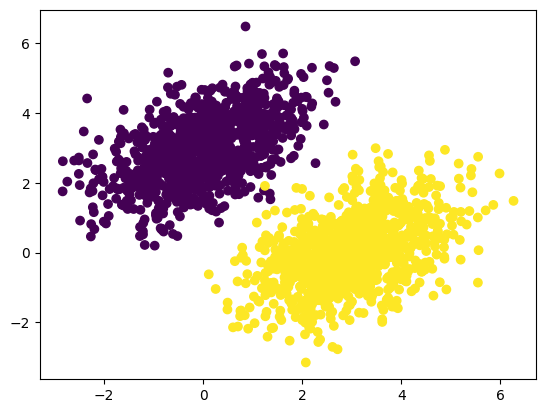

In [ ]:
#plotting the two point classes
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [ ]:
# creating linear classifier variables
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim, )))

In [ ]:
# forward pass function
def model(inputs):
  return tf.matmul(inputs, W) + b

In [ ]:
# mean square error loss function
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [ ]:
learning_rate = 0.1

# training step function

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  # updating the weights
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [ ]:
targets.shape

(2000, 1)

In [ ]:
# the batch training loop

for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step} : {loss:.4f}")

Loss at step 0 : 4.1814
Loss at step 1 : 0.4070
Loss at step 2 : 0.1594
Loss at step 3 : 0.1198
Loss at step 4 : 0.1081
Loss at step 5 : 0.1006
Loss at step 6 : 0.0942
Loss at step 7 : 0.0884
Loss at step 8 : 0.0831
Loss at step 9 : 0.0782
Loss at step 10 : 0.0737
Loss at step 11 : 0.0697
Loss at step 12 : 0.0659
Loss at step 13 : 0.0625
Loss at step 14 : 0.0594
Loss at step 15 : 0.0565
Loss at step 16 : 0.0539
Loss at step 17 : 0.0515
Loss at step 18 : 0.0493
Loss at step 19 : 0.0472
Loss at step 20 : 0.0454
Loss at step 21 : 0.0437
Loss at step 22 : 0.0421
Loss at step 23 : 0.0407
Loss at step 24 : 0.0394
Loss at step 25 : 0.0382
Loss at step 26 : 0.0371
Loss at step 27 : 0.0361
Loss at step 28 : 0.0352
Loss at step 29 : 0.0344
Loss at step 30 : 0.0336
Loss at step 31 : 0.0329
Loss at step 32 : 0.0323
Loss at step 33 : 0.0317
Loss at step 34 : 0.0312
Loss at step 35 : 0.0307
Loss at step 36 : 0.0302
Loss at step 37 : 0.0298
Loss at step 38 : 0.0294
Loss at step 39 : 0.0291


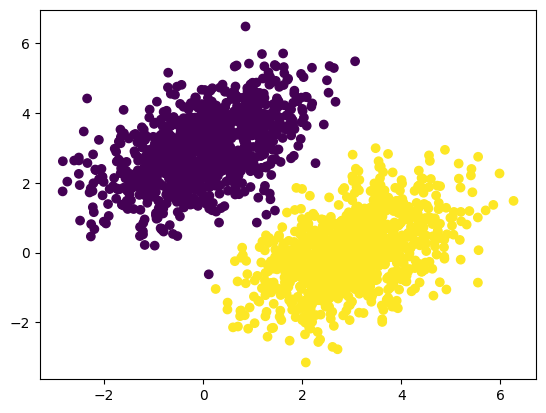

In [ ]:
# predictions

predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:] > 0.5)
plt.show()

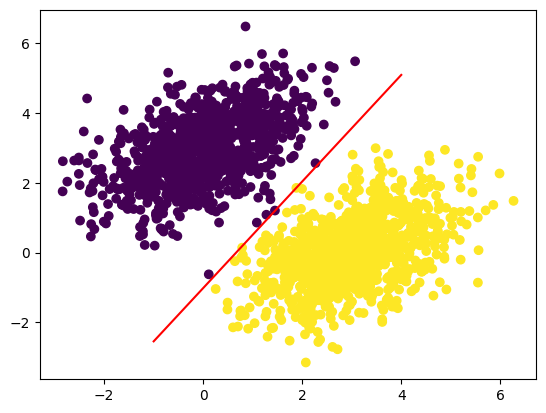

In [ ]:
# prediction == [[W1], [W2]] * [x, y] + b == ( W1*x + W2*y + b )
# class 0 ==> W1*x + W2*y + b < 0.5 ..... class 1 ==> W1*x + W2*y + b > 0.5
# equation of partitioning line ==> W1*x + W2*y + b = 0.5

x = np.linspace(-1, 4, 100) # generates 100 regularly spaced nos. b/w -1 & 4
y = -(W[0]/W[1]) * x + (0.5 - b)/W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:] > 0.5)